In [1]:
import pandas as pd
import sqlite3

In [10]:
df_imoveis = pd.read_csv('Brasile-real-estate-dataset.csv', sep=',',encoding='latin-1')

In [11]:
display(df_imoveis.head(10))

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_brl
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36
5,6,apartment,Pernambuco,Northeast,-8.137671,-34.913349,94.0,294447.66
6,7,apartment,Pernambuco,Northeast,-8.141599,-34.909179,80.0,314410.19
7,8,apartment,Pernambuco,Northeast,-8.127337,-34.902712,54.0,419213.60
8,9,apartment,Pernambuco,Northeast,-8.109289,-34.907094,NaN,349344.66
9,10,apartment,Pernambuco,Northeast,-8.109289,-34.907094,63.0,449157.45


In [12]:
df_imoveis.columns = [c.lower().strip() for c in df_imoveis.columns]

In [14]:
df_imoveis = df_imoveis.dropna(subset=['price_brl'])

In [20]:
df_imoveis = df_imoveis.dropna(subset=['area_m2'])

df_imoveis = df_imoveis.loc[:, ~df_imoveis.columns.str.contains('^unnamed')] 
df_imoveis = df_imoveis.dropna(axis=1, how='all')

In [21]:
display(df_imoveis.head(10))

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36
5,apartment,Pernambuco,Northeast,-8.137671,-34.913349,94.0,294447.66
6,apartment,Pernambuco,Northeast,-8.141599,-34.909179,80.0,314410.19
7,apartment,Pernambuco,Northeast,-8.127337,-34.902712,54.0,419213.60
9,apartment,Pernambuco,Northeast,-8.109289,-34.907094,63.0,449157.45
10,apartment,Pernambuco,Northeast,-8.126764,-34.903425,105.0,548970.21


In [22]:
df_imoveis['area_m2'] = pd.to_numeric(df_imoveis['area_m2'], errors='coerce')

df_imoveis['price_brl'] = pd.to_numeric(df_imoveis['price_brl'], errors='coerce')

In [23]:
conn = sqlite3.connect('imoveis_brasil.db')

df_imoveis.to_sql('imoveis',conn, if_exists='replace', index=False)

11293

In [29]:
query_valor_m2 = """
SELECT
    region,
    state,
    property_type,
    COUNT(*) AS total_imoveis,
    ROUND(AVG(price_brl),2) AS valor_preco_medio,
    ROUND(AVG(price_brl / area_m2), 2) as valor_m2_medio
FROM imoveis
WHERE price_brl > 0 AND area_m2 > 0
GROUP BY region, state, property_type
ORDER BY valor_m2_medio DESC
"""

df_m2 = pd.read_sql(query_valor_m2,conn)

display(df_m2.head())

,region,state,property_type,total_imoveis,valor_preco_medio,valor_m2_medio
0,Southeast,Rio de Janeiro,apartment,2036,740964.65,7885.75
1,Southeast,So Paulo,apartment,1906,716920.86,7206.15
2,South,Santa Catarina,apartment,2192,760468.40,6491.02
3,South,Rio Grande do Sul,apartment,2059,545489.33,5831.46
4,Northeast,Pernambuco,apartment,306,669471.09,5811.24


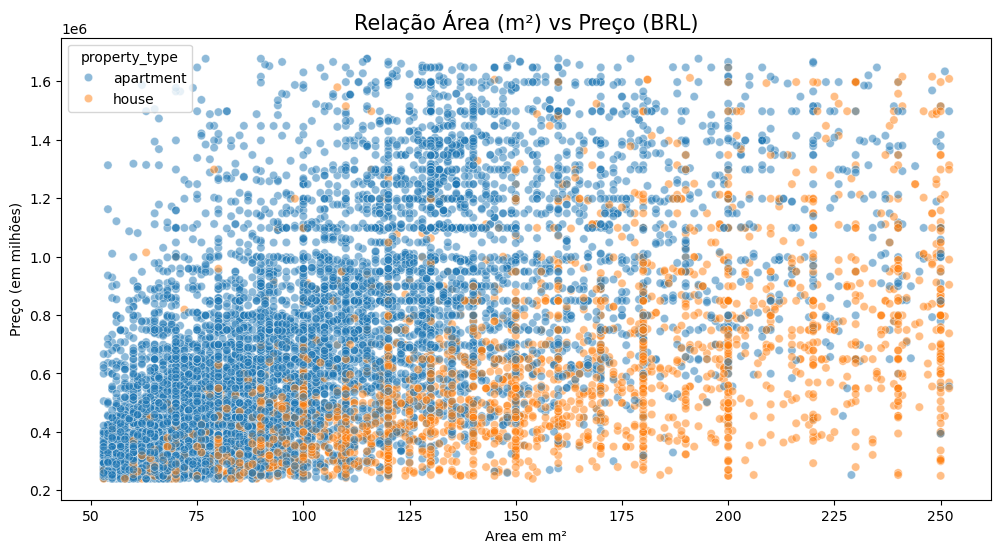

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.scatterplot(data=df_imoveis, x='area_m2',y='price_brl', hue='property_type', alpha=0.5)

plt.title('Relação Área (m²) vs Preço (BRL)', fontsize=15)
plt.xlabel('Area em m²')
plt.ylabel('Preço (em milhões)')

plt.show()

In [33]:
correlacao = df_imoveis['area_m2'].corr(df_imoveis['price_brl'])

print(f"O coeficiente de relação é: {correlacao:2f}")

O coeficiente de relação é: 0.492618


In [ ]:
#correlação considerada baixa à média, apesar da tendência clara. Faltam dados que podem ser significantes com bairro e cidade.

#O grafico mostra que em sua maioria, apartamentos apresentam preços mais elevados no geral.

In [42]:
query_estado_m2 = """
SELECT
    state,
    ROUND(AVG(price_brl / area_m2),2) AS preco_medio,
    COUNT(*) AS qtd_imoveis
FROM imoveis
WHERE area_m2 > 0 AND price_brl > 0
GROUP BY state
HAVING qtd_imoveis > 10
ORDER BY preco_medio DESC
"""

df_m2_estados = pd.read_sql(query_estado_m2, conn)

display(df_m2_estados.head(10))

,state,preco_medio,qtd_imoveis
0,Rio de Janeiro,7129.25,2642
1,So Paulo,6344.97,2656
2,Santa Catarina,6021.75,2634
3,Pernambuco,5750.65,318
4,Rio Grande do Sul,5395.81,2643
5,Piau,4639.31,24
6,Sergipe,4318.17,68
7,Rio Grande do Norte,4227.30,302


C:\Users\User\AppData\Local\Temp\ipykernel_5268\3469468117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\ProgramData\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


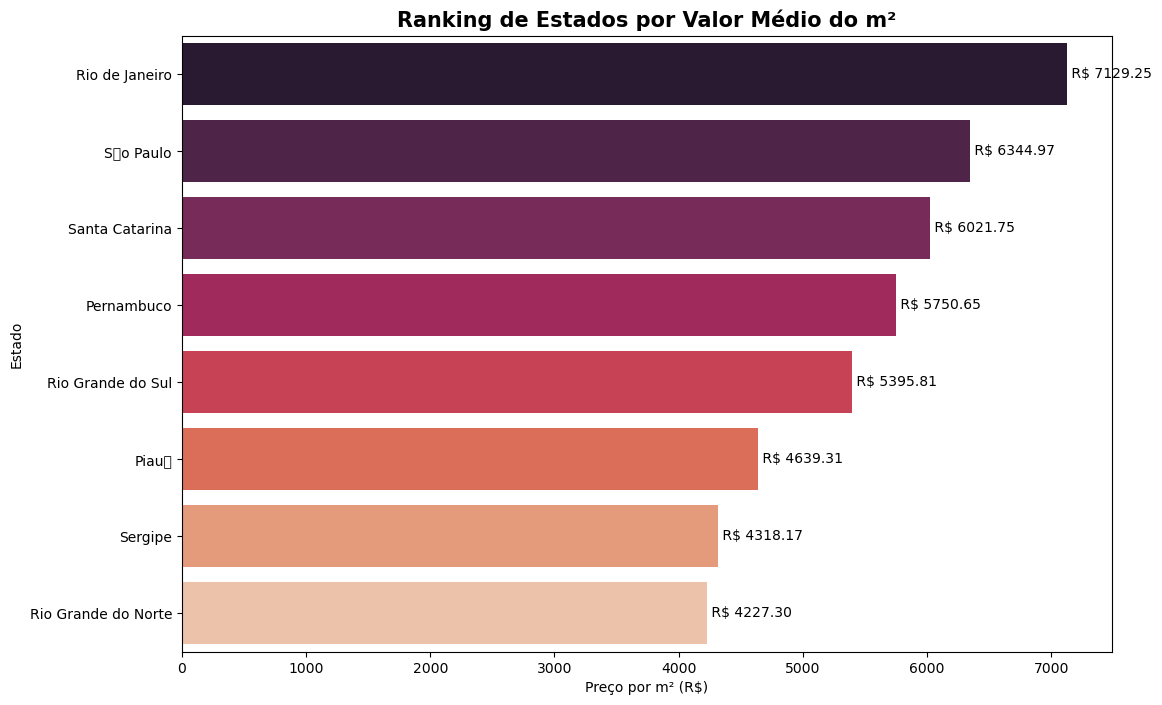

In [43]:
plt.figure(figsize=(12, 8))

# Criando o gráfico de barras
sns.barplot(
    data=df_m2_estados, 
    y='state', 
    x='preco_medio', 
    palette='rocket'
)

plt.title('Ranking de Estados por Valor Médio do m²', fontsize=15, fontweight='bold')
plt.xlabel('Preço por m² (R$)')
plt.ylabel('Estado')

# Adicionando os valores nas pontas das barras para facilitar a leitura
for index, value in enumerate(df_m2_estados['preco_medio']):
    plt.text(value, index, f' R$ {value:.2f}', va='center')

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5268\2946400934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_imoveis, x='property_type',y='price_brl', palette='Set2')


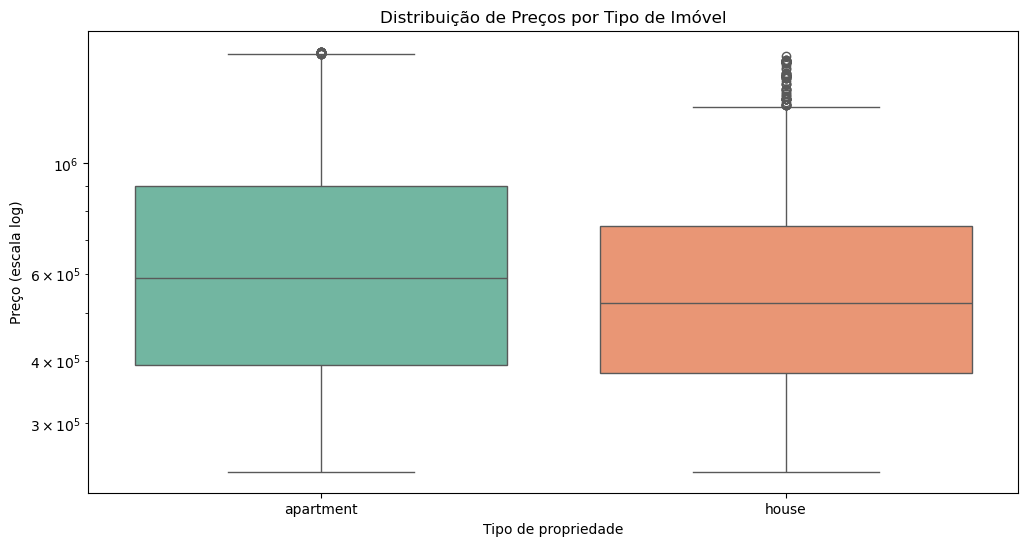

In [44]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df_imoveis, x='property_type',y='price_brl', palette='Set2')
plt.yscale('log')
plt.title('Distribuição de Preços por Tipo de Imóvel')
plt.xlabel('Tipo de propriedade')
plt.ylabel('Preço (escala log)')

plt.show()

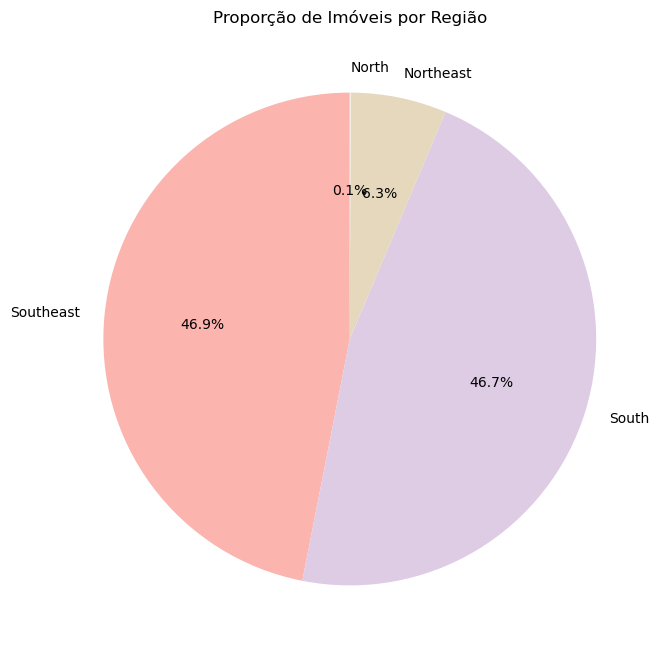

In [48]:
df_imoveis['region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1', figsize=(8,8))
plt.title('Proporção de Imóveis por Região')
plt.ylabel('')
plt.show()